In [1]:
# Importing necessary libraries
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras import Sequential
from keras.layers import Input, Dense

In [2]:
# Forming Dataset
X, y = make_moons(
    n_samples = 500,
    noise = 0.2,
    random_state = 42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

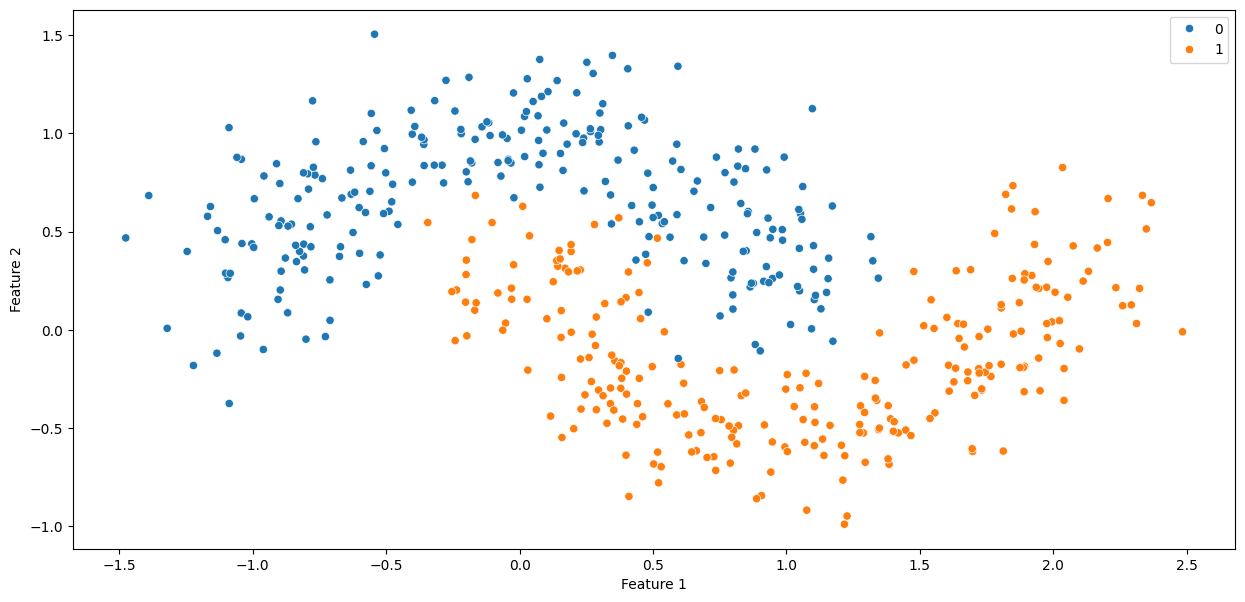

In [3]:
# Data Visualization
plt.figure(figsize = (15, 7))
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

---

## **Mathematical Intuition**

1. Random weights can make the signal grow or shrink layer-by-layer.
   - If variance keeps growing → exploding gradients.
   - If variance keeps shrinking → vanishing gradients.

2. Goal: keep **variance of activations the same** across every layer:
   $$
   \text{var}(a_{\text{out}}) = \text{var}(a_{\text{in}})
   $$

3. One-layer approximation (linear units, zero-mean data & weights):
   $$
   \text{var}(a_{\text{out}}) \approx n_{\text{in}} \cdot \text{var}(W) \cdot \text{var}(a_{\text{in}})
   $$
   where $n_{\text{in}}$ = number of fan-in weights.

4. Set $\text{var}(a_{\text{out}}) = \text{var}(a_{\text{in}})$ and solve for $\text{var}(W)$:
   $$
   \text{var}(W) = \frac{1}{n_{\text{in}}}
   $$

5. Standard Gaussian weights start with $\text{var}(W) = 1$.  
   Scale them by $c = \frac{1}{\sqrt{n_{\text{in}}}}$.  
   Variance after scaling:  
   $$
   \text{var}(c \cdot W) = c^{2} \cdot 1 = \frac{1}{n_{\text{in}}}
   $$  
   exactly what we need.

6. Result: activations keep stable variance, gradients neither explode nor vanish.

---


### Xavier/Glorot initialization using Keras - `kernel_initializer`
Xavier Initialization is particularly well-suited for activation functions like sigmoid and hyperbolic tangent (tanh), where the activation functions are sensitive to the scale of the inputs.

Normal variant:  
$$ \text{weight multiplication factor} = \sqrt{\frac{2}{\text{fan}_{\text{avg}}}} $$

Uniform variant:  
$$ \text{weight multiplication factor} = \sqrt{\frac{6}{\text{fan}_{\text{avg}}}} $$

In [4]:
# Model Building and initialization
model = Sequential([
    Input(shape = (X_train.shape[1],)),
    Dense(25,activation='tanh',kernel_initializer= keras.initializers.GlorotNormal()),
    Dense(15,activation='tanh',kernel_initializer= keras.initializers.GlorotNormal()),
    Dense(8,activation='tanh',kernel_initializer= keras.initializers.GlorotNormal()),
    Dense(4,activation='tanh',kernel_initializer= keras.initializers.GlorotNormal()),
    Dense(1,activation='sigmoid'),
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 25)             │            75 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 634 (2.48 KB)

 Trainable params: 634 (2.48 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Model Training
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X, y, epochs=50, validation_split=0.2, verbose = 1) # Increase the epochs to 500

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7575 - loss: 0.6553 - val_accuracy: 0.8400 - val_loss: 0.6127
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8150 - loss: 0.5769 - val_accuracy: 0.8300 - val_loss: 0.5493
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8150 - loss: 0.5250 - val_accuracy: 0.8400 - val_loss: 0.5093
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8175 - loss: 0.4923 - val_accuracy: 0.8500 - val_loss: 0.4819
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8250 - loss: 0.4693 - val_accuracy: 0.8600 - val_loss: 0.4614
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8375 - loss: 0.4511 - val_accuracy: 0.8500 - val_loss: 0.4476
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8425 - loss: 0.4361 - val_accuracy: 0.8600 - val_loss: 0.4336
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8400 - loss: 0.4241 - val_accuracy: 0.8700 - val_loss

28125/28125 ━━━━━━━━━━━━━━━━━━━━ 23s 818us/step


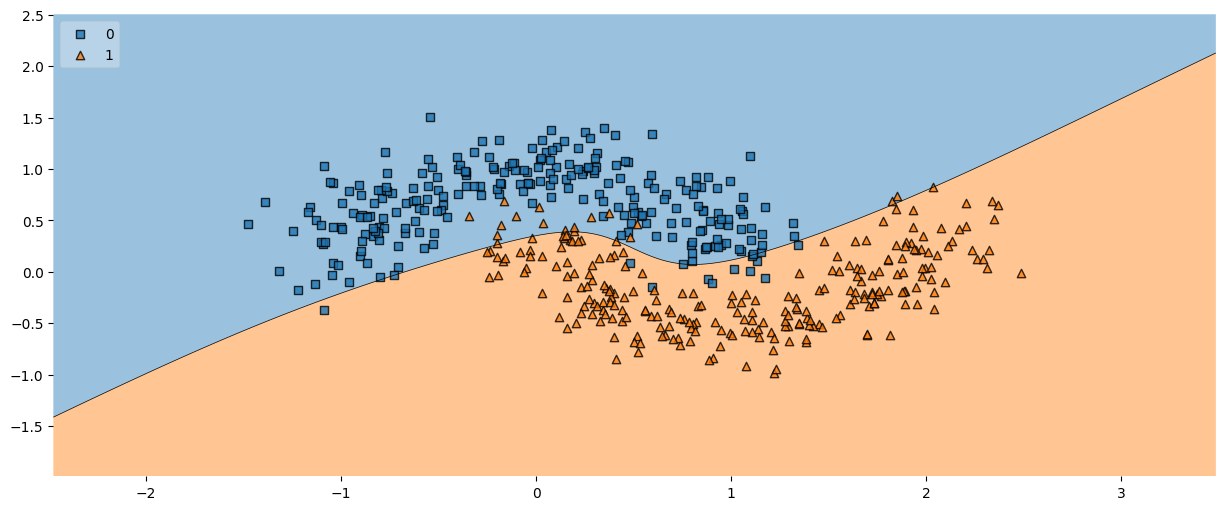

In [7]:
# Plotting Decision Regions
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (15, 6))
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)
plt.show()

### He initialization using Keras - `kernel_initializer`
He Initialization is particularly effective for neural networks that use `ReLU or its variants` as activation functions.

Normal Variant
$$
\text{weight multiplation factor: } \sqrt{\frac{2}{\text{fan\_in}}}
$$

Uniform Variant
$$
\text{weight multiplation factor: } \sqrt{\frac{6}{\text{fan\_in}}}
$$


In [8]:
# Model Building
model = Sequential()

model.add(Input(shape = (X_train.shape[1],)))
model.add(Dense(25,activation='relu',kernel_initializer= keras.initializers.HeNormal()))
model.add(Dense(15,activation='relu',kernel_initializer= keras.initializers.HeNormal()))
model.add(Dense(8,activation='relu',kernel_initializer= keras.initializers.HeNormal()))
model.add(Dense(4,activation='relu',kernel_initializer= keras.initializers.HeNormal()))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 25)             │            75 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 634 (2.48 KB)

 Trainable params: 634 (2.48 KB)

 Non-trainable params: 0 (0.00 B)

28125/28125 ━━━━━━━━━━━━━━━━━━━━ 23s 829us/step


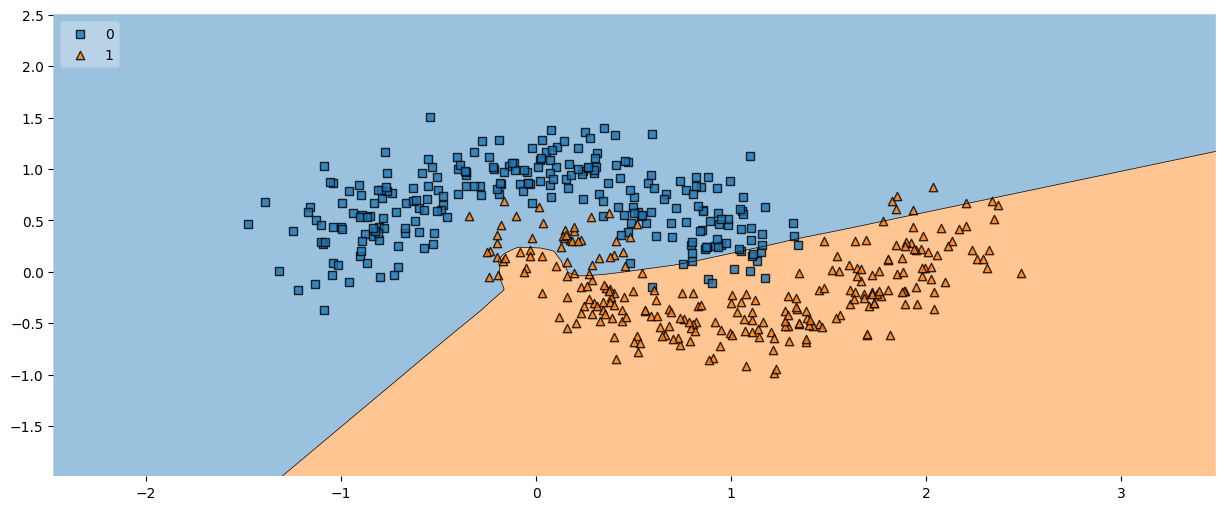

In [9]:
# Training
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X, y, epochs=50, validation_split=0.2, verbose = 0)

# Decision Regions
plt.figure(figsize = (15, 6))
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)
plt.show()

---

#### <u>Normal (Gaussian) Variant</u>
- Better for deeper networks as it helps maintain consistent variance across layers
- Common choices:
  - Xavier/Glorot Normal: For layers with tanh or sigmoid activation
  - He Normal: For layers with ReLU activation

#### <u>Uniform Variant</u>
- Good for simpler networks or when computational efficiency is important
- Common choices:
  - Xavier/Glorot Uniform: For tanh or sigmoid activation
  - He Uniform: For ReLU activation


---

You can obtain any of the initializations using the `VarianceScaling initializer`. For example, if you want He initialization with a uniform distribution and based on fanavg (rather than fanin), you can use the following code
```python
he_avg_init = tf.keras.initializers.VarianceScaling(scale=2., mode="fan_avg", distribution="uniform")
dense = tf.keras.layers.Dense(50, activation="sigmoid", kernel_initializer=he_avg_init)
```

---

Use `LeCun initialization` with the `SeLU activation function`.